In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import scipy.stats as stats
import soundfile as sf
import librosa 
from collections import defaultdict
import seaborn as sns
import scipy.stats as stats

np.seterr(divide='ignore', invalid='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [5]:
with open('Features/Features.pickle','rb') as file:
    DF=pickle.load(file)
    
for i in range(193):
    vector=[]
    for j in range(len(DF)):
        vector.append(DF.iloc[j,2][i])
    vector=np.array(vector)
    DF[i]=vector

DF=DF.drop('FeatureVector',axis=1)
DF.head()

,label,ID,0,1,2,3,4,5,6,7,...,183,184,185,186,187,188,189,190,191,192
0,siren,0,-75.095718,129.611845,-32.669896,15.285440,-2.378206,14.626389,-3.764634,17.962046,...,13.581585,15.363748,15.579746,35.387735,-0.004255,0.014481,-0.040944,0.001575,-0.005375,0.005263
1,siren,1017,-529.822549,3.207651,-39.342830,-4.806191,-1.510516,11.538968,6.360950,0.175858,...,40.240238,39.600647,35.088244,39.409279,0.000226,-0.003061,-0.005560,0.049707,-0.004167,-0.008515
2,siren,1068,-321.691683,142.703895,-29.068545,19.488420,-2.804571,17.805163,4.255999,7.789272,...,24.381119,26.783475,24.162785,38.694912,0.025281,0.024722,-0.127286,-0.032569,-0.006869,0.021095
3,siren,1069,-251.963839,114.677643,-70.299636,-5.654069,-33.883682,21.279570,9.678297,9.592076,...,24.619884,26.538950,24.144203,38.025016,-0.009540,0.018023,-0.037589,0.059820,-0.017432,-0.004185
4,siren,1116,-341.286762,148.386037,-19.530048,12.357504,10.122546,25.564659,22.492980,11.057594,...,13.280341,15.284006,16.753369,29.313002,0.001852,0.002387,0.011851,0.003681,0.024676,-0.008621


## We recall from the report on data stroy telling that each sound is tranformed into  a 193 dimensional feature vector as shown above. We begin the analysis by showing the correlation between these features over the entire set, as well the correlation of these features over each class.

We begin by looking at feature correlation over the entire data sat


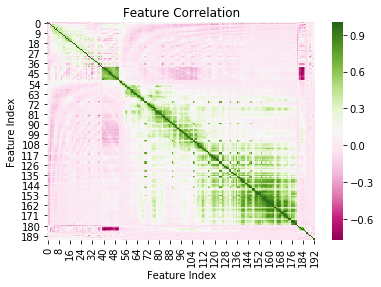

In [6]:
Observ=DF.iloc[:,2:].values.T
A=np.corrcoef(Observ)
plt.figure()
sns.heatmap(A,cmap='PiYG')
plt.title('Feature Correlation')
plt.xlabel('Feature Index')
plt.ylabel('Feature Index')
plt.show()

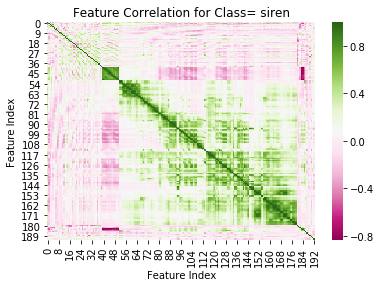

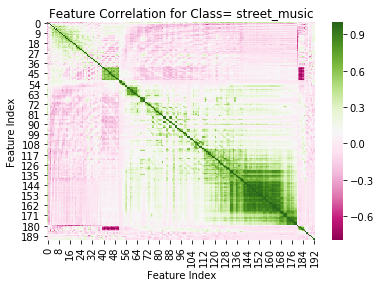

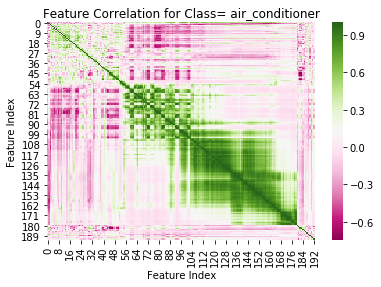

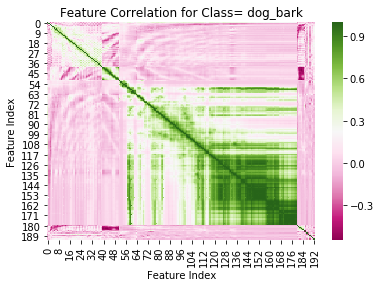

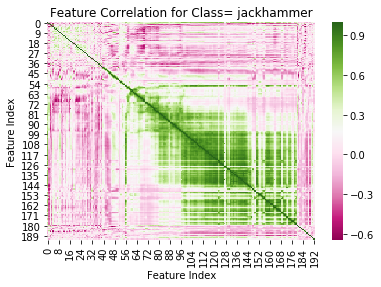

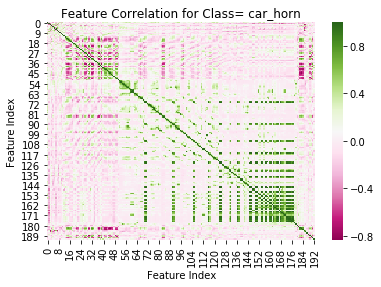

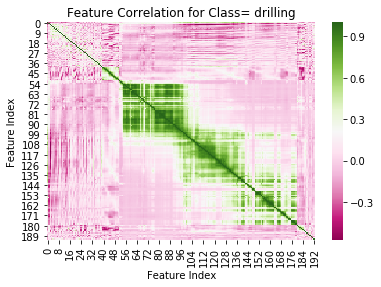

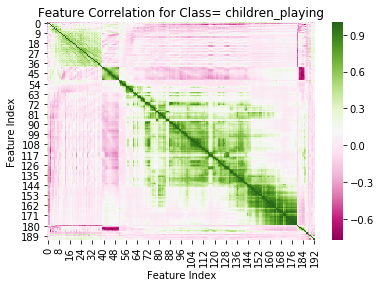

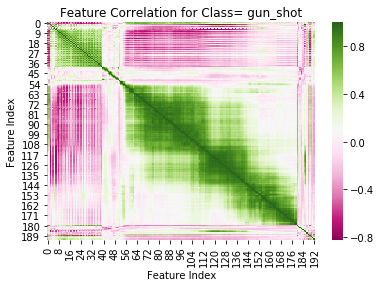

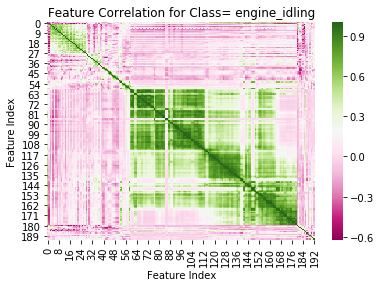

In [7]:
labels=DF['label'].unique()
for label in labels:
    Observ=DF[DF['label']==label].iloc[:,2:].values.T
    A=np.corrcoef(Observ)
    plt.figure()
    sns.heatmap(A,cmap='PiYG')
    plt.title('Feature Correlation for Class= '+str(label))
    plt.xlabel('Feature Index')
    plt.ylabel('Feature Index')
    plt.show()

    

## Likelihood Estimator: 

Within the context of probability and inferential statistics, we approach the classification problem in a

probabilistic sense.

For every class, we get an estimate of the probability density function of the features.

This can be done by building histograms or using kernel density estimators. Due to high dimensionality, histograms 

would be tough to generate (193 dimensional matrix). We use kernel density estimators without digging too deep into 

the theory.


In [ ]:
## Using Kernel Density Estimators.

In [137]:
DF1=DF.sample(n=len(DF)) #we shuffle the data frame so we dont get chunks data with similar class.
DF1.head()


,label,ID,0,1,2,3,4,5,6,7,...,183,184,185,186,187,188,189,190,191,192
4033,children_playing,1869,-216.878360,97.887610,-41.072803,25.328582,-14.576229,-3.189168,7.735373,-0.888162,...,16.548677,17.956036,24.569233,32.278741,-0.001082,0.003272,-0.019298,0.006620,0.007972,-0.000064
3211,car_horn,4883,-217.639069,98.515464,21.203453,-1.908987,4.169933,-2.020263,-12.973834,8.657580,...,15.733229,17.102157,17.556475,33.772467,-0.007103,0.003535,0.022152,0.021199,0.001179,-0.001266
116,siren,253,-305.950258,127.023188,-39.848954,1.836900,0.002172,22.531047,32.838554,10.954795,...,14.614321,18.329454,18.492801,28.908633,0.010178,0.007519,-0.003621,0.028931,-0.001824,-0.006345
1560,air_conditioner,5472,-406.918060,167.969600,-5.899884,23.970838,-0.727254,14.635024,2.632335,12.842413,...,15.305265,15.387513,16.389742,32.470664,-0.002266,0.021289,-0.030154,-0.053473,0.001217,0.009387
4418,children_playing,6732,-158.871979,108.817925,3.035629,16.039425,9.677266,17.446661,-0.579231,5.067008,...,16.912348,18.668060,17.462615,44.712625,0.008060,-0.015624,0.017099,-0.089474,0.011458,0.026995


In [138]:
#training Features and labels:
DataSplit=4500

DFTrain=DF1.iloc[:DataSplit,:]
TrainLabels=DF1.iloc[:DataSplit,0]


#testing Features and labels:
DFTest=DF1.iloc[DataSplit:,:]
TestLabels=DF1.iloc[DataSplit:,0]

#all classes:
labels=DF['label'].unique()

In [139]:
#for every class, we obtain a pdf for the features.

pdfs=[]
for label in labels:
    df=DFTrain[DFTrain['label']==label]
    Matrix=df.iloc[:,2:].values.T
    pdfs.append(stats.gaussian_kde(Matrix))
    print(label+' has length: '+str(len(df)))

siren has length: 511
street_music has length: 499
air_conditioner has length: 485
dog_bark has length: 484
jackhammer has length: 562
car_horn has length: 261
drilling has length: 500
children_playing has length: 482
gun_shot has length: 195
engine_idling has length: 521


We define a function now that given an observation (a 193 dimensioal feature vector), the pdf assuming each class

is evaluated at this feature, and the class that returns the greatest value is returned.

In [140]:
def GiveClass(Observation,pdfs):
    

    vals=[]
    
    for pdf in pdfs:
        vals.append(pdf(Observation))
        
    #rint(vals)
    vals=np.array(vals)
    return np.argmax(vals)

We now get the values the above function takes at all the test values.

In [141]:
Guess=[]
for i in range(len(DFTest)):
    row=np.zeros(193)
    for j in range(193):
        row[j]=DFTest.iloc[i,j+2]
    Guess.append(GiveClass(row,pdfs))

In [142]:
#number of correct predictions:
p=np.sum(labels[Guess]==TestLabels)/len(Guess)

print(p)

0.704812834224599


As we can see above around 70% of the data was predicted correctly. As in the data story telling report,

we show the confusion matrix to explain the performance of this classification algorithm.


Confusion matrix, without normalization
[[88  3  2  1  0  0  2  0  0  0]
 [22 58  4  1  1  0  2 12  0  1]
 [ 2  3 95  2  0  0 13  0  0  0]
 [15  8  5 55  0  0  4 27  0  2]
 [ 5  1  0  0 95  0  5  0  0  0]
 [14  5  0  0  0 25  0  1  0  0]
 [ 7  8  1  1  3  0 77  3  0  0]
 [12 10  4  7  2  0  4 79  0  0]
 [20  0  0  2  0  0 10  3  0  0]
 [ 3  7  1  1  1  0  3  0  0 87]]


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

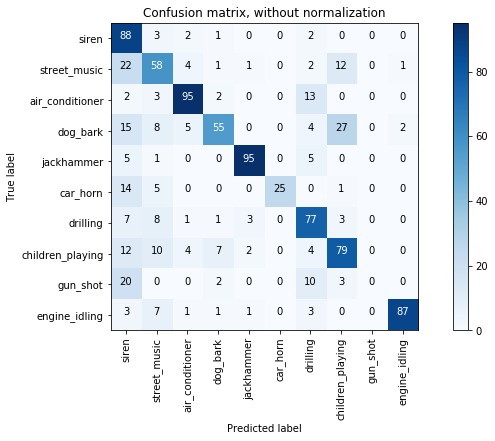

In [144]:
from sklearn.metrics import confusion_matrix

ConfMatrix=confusion_matrix(DFTest.label.values,labels[Guess],labels=labels)

import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

    
plt.figure(figsize=(10,6))
plot_confusion_matrix(ConfMatrix, classes=labels,title='Confusion matrix, without normalization')
plt.xticks(rotation='vertical')